In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates


In [56]:
df = pd.read_excel(
    "2021 FK Publication Tables  final.xlsx", 
    "Table 42 ", 
    # index_col=0, 
    usecols="A:M",
    skiprows=lambda x: x not in range(3, 18) # was having problems because I forgot the rows were 0-indexed unlike on the sheet itself
    )

# Cleaning

In [57]:
df

,Known offender,Unnamed: 1,Total,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Number of known offenders,NaN,491,51,28,60,37,56,44,57,49,43,66
1,Race,White,264,32,15,43,18,33,26,33,28,16,20
2,NaN,Black/African American,156,17,12,14,18,17,16,23,15,13,11
3,NaN,American Indian/Alaska Native,7,1,0,2,1,1,1,0,0,1,0
4,NaN,Asian,2,0,0,1,0,0,1,0,0,0,0
5,NaN,Native Hawaiian/Other Pacific Islander,3,1,0,0,0,0,0,1,1,0,0
6,NaN,Not reported,59,0,1,0,0,5,0,0,5,13,35
7,Ethnicity,Hispanic or Latino,84,7,3,19,3,9,5,10,14,7,7
8,NaN,Not Hispanic or Latino,329,41,23,39,33,41,38,46,25,22,21
9,NaN,Not reported,78,3,2,2,1,6,1,1,10,14,38


In [58]:
# filling in NaN's
df.fillna(method="ffill", inplace=True)
df.fillna(value=df.iloc[0][0], inplace=True)
df

,Known offender,Unnamed: 1,Total,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Number of known offenders,Number of known offenders,491,51,28,60,37,56,44,57,49,43,66
1,Race,White,264,32,15,43,18,33,26,33,28,16,20
2,Race,Black/African American,156,17,12,14,18,17,16,23,15,13,11
3,Race,American Indian/Alaska Native,7,1,0,2,1,1,1,0,0,1,0
4,Race,Asian,2,0,0,1,0,0,1,0,0,0,0
5,Race,Native Hawaiian/Other Pacific Islander,3,1,0,0,0,0,0,1,1,0,0
6,Race,Not reported,59,0,1,0,0,5,0,0,5,13,35
7,Ethnicity,Hispanic or Latino,84,7,3,19,3,9,5,10,14,7,7
8,Ethnicity,Not Hispanic or Latino,329,41,23,39,33,41,38,46,25,22,21
9,Ethnicity,Not reported,78,3,2,2,1,6,1,1,10,14,38


In [53]:
list(df.columns[[0,1]])



['Known offender', 'Unnamed: 1']

In [59]:
df.set_index(list(df.columns[[0,1]]), inplace=True)
df

Total  2012  \
Known offender            Unnamed: 1                                            
Number of known offenders Number of known offenders                 491    51   
Race                      White                                     264    32   
                          Black/African American                    156    17   
                          American Indian/Alaska Native               7     1   
                          Asian                                       2     0   
                          Native Hawaiian/Other Pacific Islander      3     1   
                          Not reported                               59     0   
Ethnicity                 Hispanic or Latino                         84     7   
                          Not Hispanic or Latino                    329    41   
                          Not reported                               78     3   
Sex                       Male                                      465    50   
                          Female                                     14     1   
                          Not reported                               12     0   

                                                                  2013  2014  \
Known offender            Unnamed: 1                                           
Number of known offenders Number of known offenders                 28    60   
Race                      White                                     15    43   
                          Black/African American                    12    14   
                          American Indian/Alaska Native              0     2   
                          Asian                                      0     1   
                          Native Hawaiian/Other Pacific Islander     0     0   
                          Not reported                               1     0   
Ethnicity                 Hispanic or Latino                         3    19   
                          Not Hispanic or Latino                    23    39   
                          Not reported                               2     2   
Sex                       Male                                      27    55   
                          Female                                     1     5   
                          Not reported                               0     0   

                                                                  2015  2016  \
Known offender            Unnamed: 1                                           
Number of known offenders Number of known offenders                 37    56   
Race                      White                                     18    33   
                          Black/African American                    18    17   
                          American Indian/Alaska Native              1     1   
                          Asian                                      0     0   
                          Native Hawaiian/Other Pacific Islander     0     0   
                          Not reported                               0     5   
Ethnicity                 Hispanic or Latino                         3     9   
                          Not Hispanic or Latino                    33    41   
                          Not reported                               1     6   
Sex                       Male                                      37    56   
                          Female                                     0     0   
                          Not reported                               0     0   

                                                                  2017  2018  \
Known offender            Unnamed: 1                                           
Number of known offenders Number of known offenders                 44    57   
Race                      White                                     26    33   
                          Black/African American                    16    23   
                          American Indian/Alaska

In [60]:
df.index.names = ["Category", "Sub-Category"]
df

Total  2012  \
Category                  Sub-Category                                          
Number of known offenders Number of known offenders                 491    51   
Race                      White                                     264    32   
                          Black/African American                    156    17   
                          American Indian/Alaska Native               7     1   
                          Asian                                       2     0   
                          Native Hawaiian/Other Pacific Islander      3     1   
                          Not reported                               59     0   
Ethnicity                 Hispanic or Latino                         84     7   
                          Not Hispanic or Latino                    329    41   
                          Not reported                               78     3   
Sex                       Male                                      465    50   
                          Female                                     14     1   
                          Not reported                               12     0   

                                                                  2013  2014  \
Category                  Sub-Category                                         
Number of known offenders Number of known offenders                 28    60   
Race                      White                                     15    43   
                          Black/African American                    12    14   
                          American Indian/Alaska Native              0     2   
                          Asian                                      0     1   
                          Native Hawaiian/Other Pacific Islander     0     0   
                          Not reported                               1     0   
Ethnicity                 Hispanic or Latino                         3    19   
                          Not Hispanic or Latino                    23    39   
                          Not reported                               2     2   
Sex                       Male                                      27    55   
                          Female                                     1     5   
                          Not reported                               0     0   

                                                                  2015  2016  \
Category                  Sub-Category                                         
Number of known offenders Number of known offenders                 37    56   
Race                      White                                     18    33   
                          Black/African American                    18    17   
                          American Indian/Alaska Native              1     1   
                          Asian                                      0     0   
                          Native Hawaiian/Other Pacific Islander     0     0   
                          Not reported                               0     5   
Ethnicity                 Hispanic or Latino                         3     9   
                          Not Hispanic or Latino                    33    41   
                          Not reported                               1     6   
Sex                       Male                                      37    56   
                          Female                                     0     0   
                          Not reported                               0     0   

                                                                  2017  2018  \
Category                  Sub-Category                                         
Number of known offenders Number of known offenders                 44    57   
Race                      White                                     26    33   
                          Black/African American                    16    23   
                          American Indian/Alaska

# Analyzing

In [72]:
# transposing to be able to plot easily
dft = df.T
dft.index.name = "Year"

dft

Category     Number of known offenders  Race                         \
Sub-Category Number of known offenders White Black/African American   
Year                                                                  
Total                              491   264                    156   
2012                                51    32                     17   
2013                                28    15                     12   
2014                                60    43                     14   
2015                                37    18                     18   
2016                                56    33                     17   
2017                                44    26                     16   
2018                                57    33                     23   
2019                                49    28                     15   
2020                                43    16                     13   
2021                                66    20                     11   

Category                                          \
Sub-Category American Indian/Alaska Native Asian   
Year                                               
Total                                    7     2   
2012                                     1     0   
2013                                     0     0   
2014                                     2     1   
2015                                     1     0   
2016                                     1     0   
2017                                     1     1   
2018                                     0     0   
2019                                     0     0   
2020                                     1     0   
2021                                     0     0   

Category                                                          \
Sub-Category Native Hawaiian/Other Pacific Islander Not reported   
Year                                                               
Total                                             3           59   
2012                                              1            0   
2013                                              0            1   
2014                                              0            0   
2015                                              0            0   
2016                                              0            5   
2017                                              0            0   
2018                                              1            0   
2019                                              1            5   
2020                                              0           13   
2021                                              0           35   

Category              Ethnicity                                      Sex  \
Sub-Category Hispanic or Latino Not Hispanic or Latino Not reported Male   
Year                                                                       
Total                        84                    329           78  465   
2012                          7                     41            3   50   
2013                          3                     23            2   27   
2014                         19                     39            2   55   
2015                          3                     33            1   37   
2016                          9                     41            6   56   
2017                          5                     38            1   44   
2018                         10                     46            1   55   
2019                         14                     25           10   48   
2020                          7                     22           14   40   
2021                          7                     21           38   53   

Category                          
Sub-Category Female Not reported  
Year                              
Total            14           12  
2012              1            0  
2013              1            0  
2014              5            0  
2015         

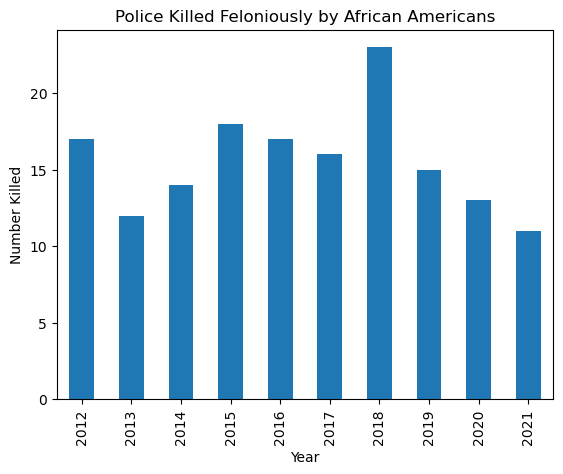

In [90]:
dft.drop("Total").loc[:,("Race", "Black/African American")].plot(
    kind="bar",
    title="Police Killed Feloniously by African Americans",
    xlabel="Year",
    ylabel="Number Killed"
);

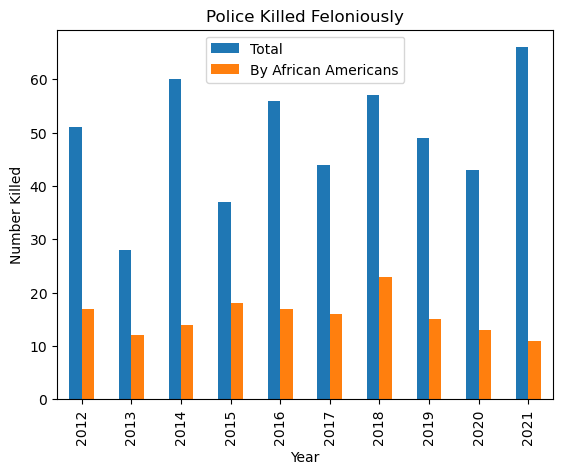

In [93]:
fig, ax = plt.subplots()

dft.drop("Total").loc[:, [("Number of known offenders", "Number of known offenders"), ("Race", "Black/African American")]].plot(
    kind="bar",
    title="Police Killed Feloniously",
    xlabel="Year",
    ylabel="Number Killed",
    ax=ax
);
ax.legend(["Total", "By African Americans"]);

/var/folders/xf/hvmt2df550v3bwqbms0tskbm0000gn/T/ipykernel_38458/3452695993.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  dft.drop("Total").loc[:, ("Race", )].plot(


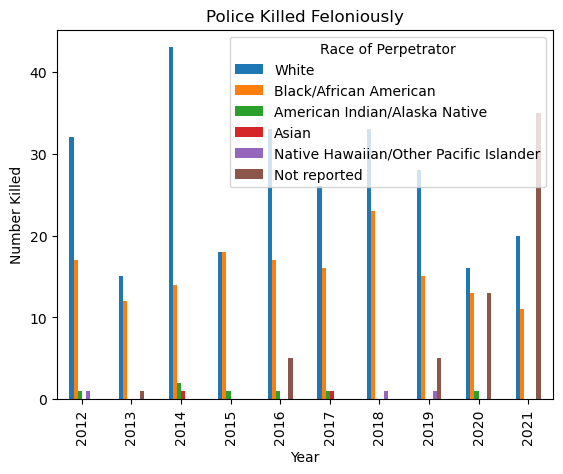

In [104]:
fig, ax = plt.subplots()

dft.drop("Total").loc[:, ("Race", )].plot(
    kind="bar",
    title="Police Killed Feloniously",
    xlabel="Year",
    ylabel="Number Killed",
    ax=ax
);
ax.legend(title="Race of Perpetrator"); # ["Total", "By African Americans"]);